In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
dataset=pd.read_csv("Social_Network_Ads.csv")
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
x = dataset.iloc[:, [2, 3]]
y = dataset.iloc[:, 4].values

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [6]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [18]:
from sklearn.svm import SVC
classifier=SVC()
classifier.fit(x_train,y_train)

SVC()

In [19]:
y_pred=classifier.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [20]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[64,  4],
       [ 3, 29]], dtype=int64)

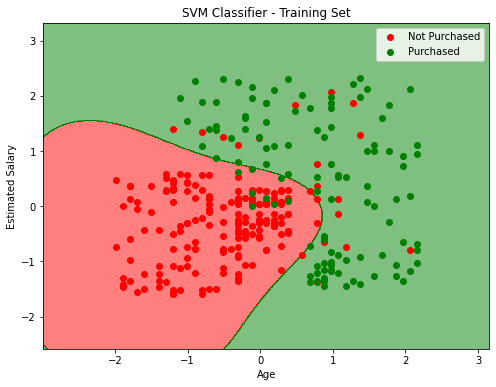

In [21]:
from matplotlib.colors import ListedColormap
X1, X2 = np.meshgrid(np.arange(start=x_train[:, 0].min() - 1, stop=x_train[:, 0].max() + 1, step=0.01),
                     np.arange(start=x_train[:, 1].min() - 1, stop=x_train[:, 1].max() + 1, step=0.01))
Z = classifier.predict(np.array([X1.ravel(), X2.ravel()]).T)
Z = Z.reshape(X1.shape)
cmap = ListedColormap(('red', 'green'))
plt.figure(figsize=(8, 6))
plt.contourf(X1, X2, Z, alpha=0.5, cmap=cmap)
plt.scatter(x_train[y_train == 0, 0], x_train[y_train == 0, 1], color='red', label='Not Purchased')
plt.scatter(x_train[y_train == 1, 0], x_train[y_train == 1, 1], color='green', label='Purchased')
plt.title('SVM Classifier - Training Set')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

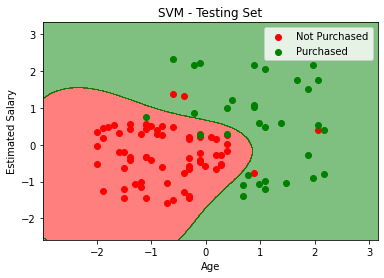

In [22]:
from matplotlib.colors import ListedColormap
X1, X2 = np.meshgrid(np.arange(start=x_train[:, 0].min() - 1, stop=x_train[:, 0].max() + 1, step=0.01),
                     np.arange(start=x_train[:, 1].min() - 1, stop=x_train[:, 1].max() + 1, step=0.01))
Z = classifier.predict(np.array([X1.ravel(), X2.ravel()]).T)
Z = Z.reshape(X1.shape)
cmap = ListedColormap(('red', 'green'))
plt.contourf(X1, X2, Z, alpha = 0.5, cmap = cmap)
plt.scatter(x_test[y_test == 0, 0], x_test[y_test == 0, 1], color = 'red', label = 'Not Purchased')
plt.scatter(x_test[y_test == 1, 0], x_test[y_test == 1, 1], color = 'green', label = 'Purchased')
plt.title('SVM - Testing Set')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9